In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils

In [2]:
df=pd.read_csv("Monacoins.csv")

In [3]:
df.shape

(2615, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2615 non-null   object 
 1   Open        2615 non-null   float64
 2   High        2615 non-null   float64
 3   Low         2615 non-null   float64
 4   Close       2615 non-null   float64
 5   Volume      2615 non-null   float64
 6   Market Cap  2615 non-null   float64
dtypes: float64(6), object(1)
memory usage: 143.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2615.000000,2615.000000,2615.000000,2615.000000,2.615000e+03,2.615000e+03
mean,1.179590,1.248301,1.114494,1.180237,3.715336e+06,7.103612e+07
std,1.847778,2.008581,1.706648,1.847714,1.176391e+07,1.069984e+08
min,0.022056,0.023839,0.019599,0.022183,1.939900e+02,1.652365e+05
25%,0.064487,0.068038,0.061844,0.064521,3.103495e+03,1.762069e+06
50%,0.527623,0.560072,0.511930,0.532834,2.406430e+05,3.358268e+07
75%,1.639442,1.699428,1.561628,1.640577,2.766360e+06,1.074119e+08
max,16.705099,20.233900,14.223500,16.614799,2.623636e+08,9.276313e+08


In [6]:
df.drop(['Date'],axis=1,inplace=True) 

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [8]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
0,1.912297,1.976320,1.857681,1.935733,5614085.04,1.272351e+08
1,1.824663,1.952411,1.811286,1.912765,4423264.05,1.257254e+08
2,1.858980,1.864760,1.753489,1.823538,4157127.53,1.198606e+08


In [9]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

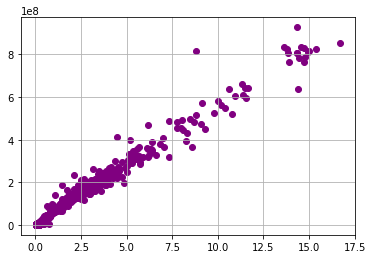

In [10]:
plt.scatter(df['Open'], df['Market Cap'], color='purple')
plt.grid(True)
plt.show()

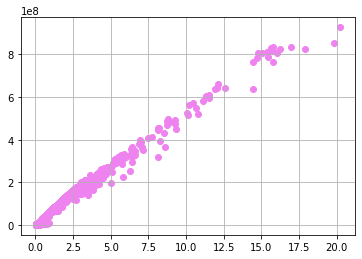

In [11]:
plt.scatter(df['High'], df['Market Cap'], color='violet')
plt.grid(True)
plt.show()

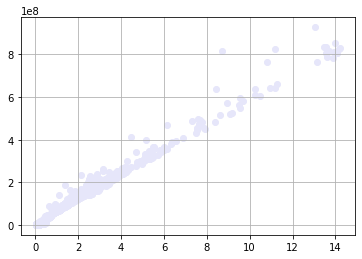

In [12]:
plt.scatter(df['Low'], df['Market Cap'], color='lavender')
plt.grid(True)
plt.show()

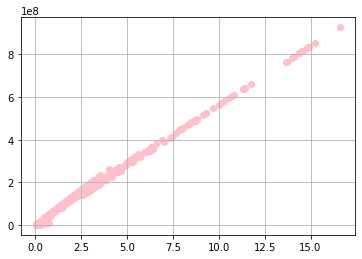

In [15]:
plt.scatter(df['Close'], df['Market Cap'], color='pink')
plt.grid(True)
plt.show()

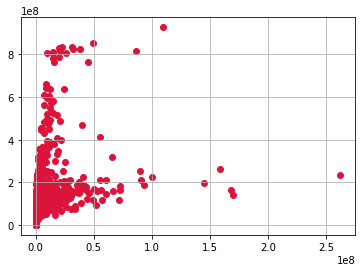

In [16]:
plt.scatter(df['Volume'], df['Market Cap'], color='crimson')
plt.grid(True)
plt.show()

#### FEATURES

In [17]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [18]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [19]:
print(utils.multiclass.type_of_target(y))

continuous


In [20]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [21]:
print(utils.multiclass.type_of_target(encoded))

multiclass


#### MODEL 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
model1 =  LinearRegression()

In [25]:
scaler = StandardScaler()

X = scaler.fit_transform(X) 

In [26]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [27]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.626632704004128]

In [28]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.626632704004128]

In [29]:
y_pred1 = model1.predict(X_test)

In [30]:
df2=pd.DataFrame({'Predicted values':y_pred1,'Actual values':encoded_test})
df2

,Predicted values,Actual values
0,1906.802592,2346
1,937.248463,916
2,933.767936,542
3,1235.230454,1470
4,1413.453726,1842
...,...,...
780,922.552131,447
781,2053.884885,2430
782,2780.817271,2541
783,885.487318,935


In [31]:
import pickle
pkl_file= open('Monacoin.pkl',"wb")
pickle.dump(model1,pkl_file)
pkl_file.close()